In [126]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [127]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

np.set_printoptions(suppress=True)

In [128]:
%matplotlib inline

In [146]:
from initializations import (
    initialize_agents,
    initialize_beacons
)

from influences import (
    rotation_influence,
    position_influence,
    alignment_influence,
    cohesion_influence
)

from simulations import (
    look_at_beacon,
    move_to_beacon,
    look_with_neighbors,
    move_with_neighbors,
    individual_motion,
    collective_motion,
    motion_simulation
)

from diagnostics import (
    inspect_simulation,
    inspect_rotation_influence,
    inspect_position_influence,
    inspect_alignment_influence,
    inspect_cohesion_influence
)

In [130]:
agent_pos, agent_rot = initialize_agents(num_agents=24)
beacon_pos = initialize_beacons(room_sensing_range=20., num_beacons=12)

agent_rot

array([[-1.5036616 ],
       [-0.49352652],
       [ 0.08022933],
       [ 2.2124996 ],
       [-0.5594024 ],
       [ 0.9551545 ],
       [-0.14040144],
       [-2.8874335 ],
       [-0.04123856],
       [ 2.3373072 ],
       [-2.633614  ],
       [-1.60511   ],
       [-0.403675  ],
       [ 1.1011742 ],
       [-1.4645307 ],
       [-2.8608465 ],
       [ 0.9448052 ],
       [-1.5094692 ],
       [ 2.1773362 ],
       [-2.635127  ],
       [ 2.2374644 ],
       [ 0.5337256 ],
       [-1.6689461 ],
       [-1.63096   ]], dtype=float32)

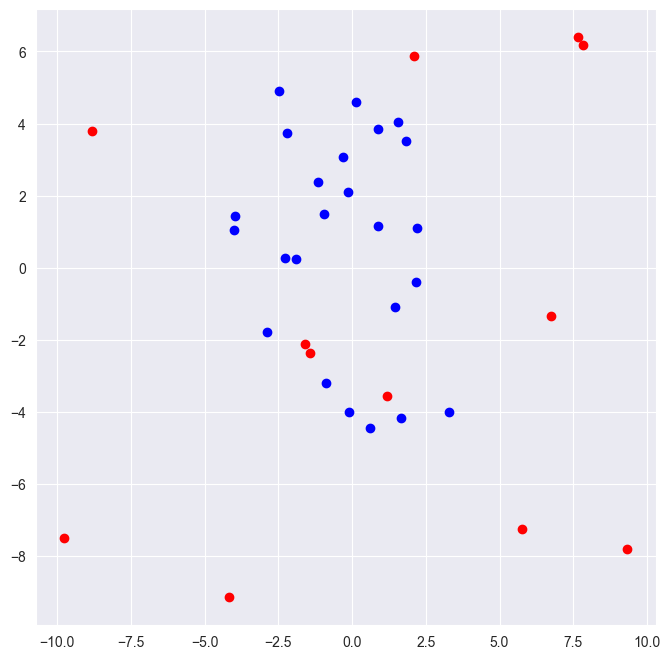

In [131]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.scatter(agent_pos[:,0], agent_pos[:,1], color='blue')
ax.scatter(beacon_pos[:,0], beacon_pos[:,1], color='red')

In [49]:
sim = motion_simulation(timesteps=300)

### Full simulation

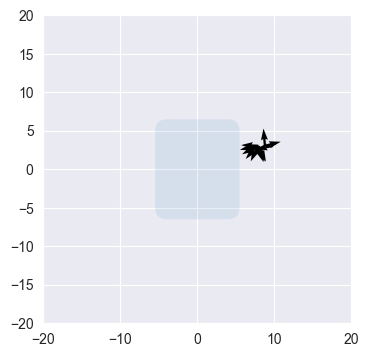

In [50]:
a = inspect_simulation(sim)
a.save('./../media/gif/animation.gif', writer=PillowWriter(fps=30))

### Rotation

In [132]:
ext_rotation = rotation_influence(agent_pos[0], agent_rot[0], beacon_pos[0])
ext_rotation

-2.536221905322292

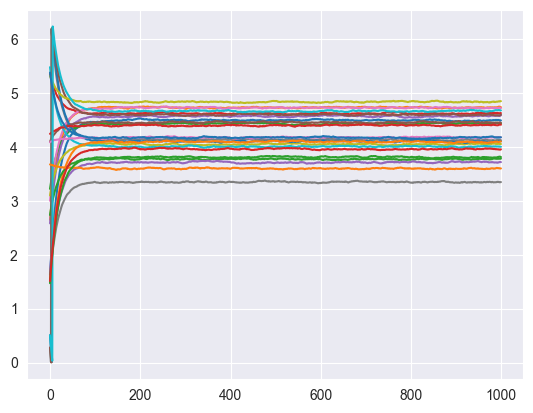

In [133]:
for i in range(len(agent_pos)):
    ext_rotation_sim = look_at_beacon(agent_pos[i], agent_rot[i], beacon_pos[-1], noise=0.2)
    plt.plot((ext_rotation_sim - np.pi) % (2 * np.pi))

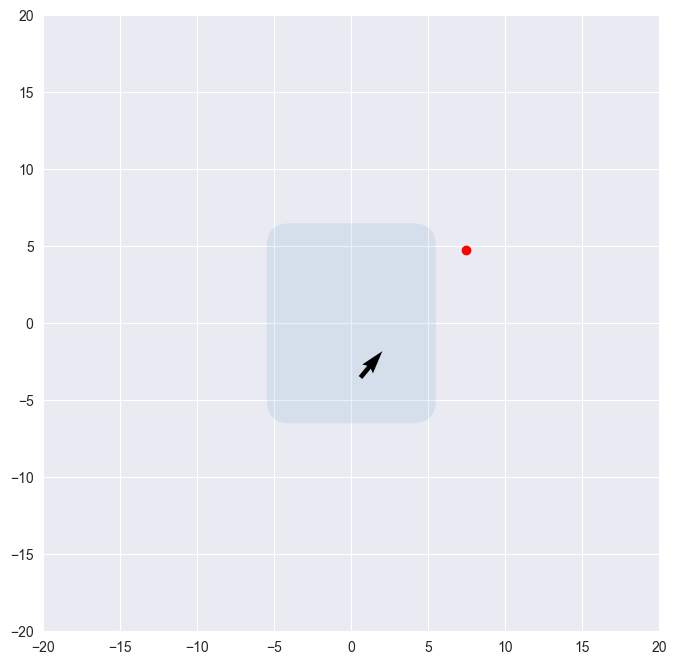

In [94]:
a = inspect_rotation_influence(ext_rotation_sim, agent_pos[-1], beacon_pos[-1])
a.save('./../media/gif/rotation1.gif', writer=PillowWriter(fps=30))

### Position

In [134]:
p_influence = position_influence(agent_pos[-1], beacon_pos[-1], noise=0.1)

direction = np.arctan2(beacon_pos[-1, 1] - agent_pos[-1, 1], beacon_pos[-1, 0] - agent_pos[-1, 0])

print(p_influence, direction)

0.8507827691774241 0.81959176


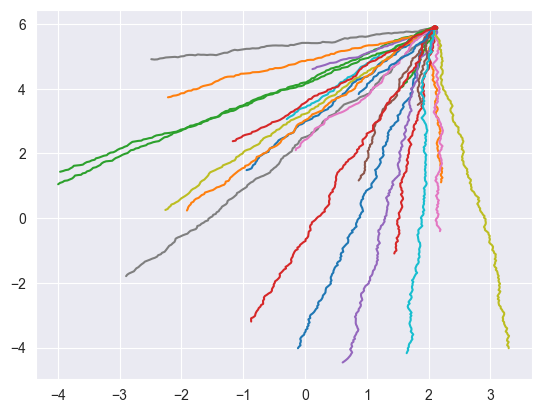

In [135]:
for i in range(len(agent_pos)):
    ext_position_sim = move_to_beacon(agent_pos[i], beacon_pos[-1], noise=1.)
    plt.plot(ext_position_sim[:,0], ext_position_sim[:,1])

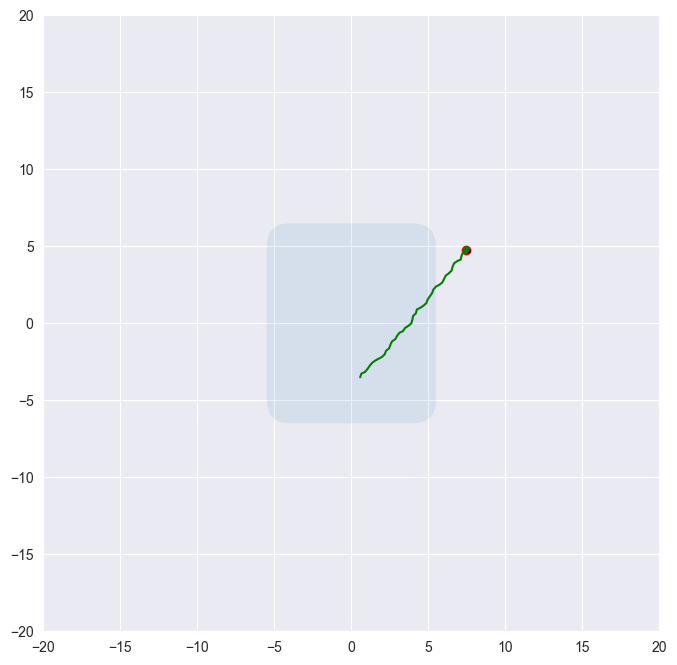

In [97]:
position_sim = move_to_beacon(agent_pos[-1], beacon_pos[-1], dt=0.5, timesteps=100, noise=1.)
b = inspect_position_influence(position_sim, beacon_pos[-1])
b.save('./../media/gif/position1.gif', writer=PillowWriter(fps=10))

### Alignment

In [139]:
al_influence = alignment_influence(agent_pos[2], agent_pos, agent_rot)
al_influence

-0.3066700053219217

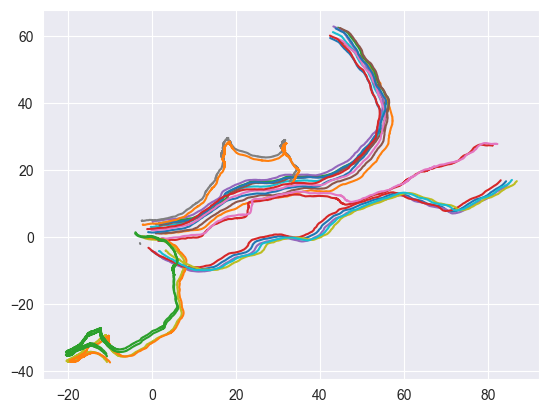

In [144]:
alignment_sim = look_with_neighbors(agent_pos, agent_rot, sensing_radius=2., noise=0.5)
for i in range(len(agent_pos)):
    plt.plot(alignment_sim[:,i,0], alignment_sim[:,i,1])

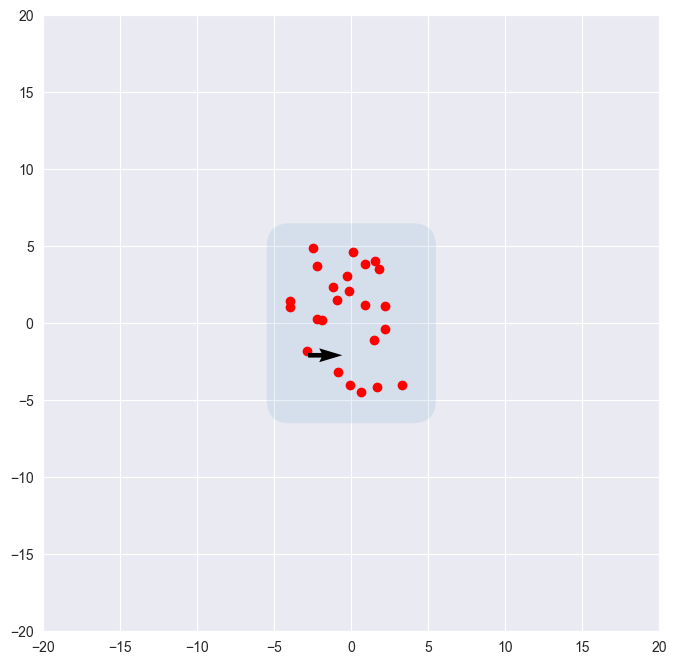

In [145]:
al = inspect_alignment_influence(alignment_sim)

al.save('./../media/gif/alignment1.gif', writer=PillowWriter(fps=10))